In [19]:
import pandas as pd

In [22]:
credit_train = pd.read_csv("./data/credit_train.csv", encoding="WINDOWS-1252", sep=";")

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [25]:
credit_train.open_account_flg.value_counts(1)

0    0.823972
1    0.176028
Name: open_account_flg, dtype: float64

In [179]:
categorical_feature = ["gender", "marital_status", "job_position", "education", "living_region"]

In [35]:
credit_train.living_region.value_counts()

ÎÁË ÌÎÑÊÎÂÑÊÀß          12228
ÊÐÀÑÍÎÄÀÐÑÊÈÉ ÊÐÀÉ       7457
ÑÀÍÊÒ-ÏÅÒÅÐÁÓÐÃ          5632
ÌÎÑÊÂÀ                   5529
ÒÀÒÀÐÑÒÀÍ ÐÅÑÏ           5187
                        ...  
ÈÍÃÓØÅÒÈß ÐÅÑÏ              1
ÊÈÐÎÂÑÊÀß ÎÁËÀÑÒÜ           1
ÎÁË. ÌÓÐÌÀÍÑÊÀß             1
ÊÀÐÅËÈß                     1
ÊÀËÈÍÈÍÃÐÀÄÑÊÀß ÎÁË.        1
Name: living_region, Length: 301, dtype: int64

In [38]:
target_by_region = credit_train.groupby("living_region").agg({'client_id': 'count', 'open_account_flg': 'mean'}).reset_index()

In [45]:
default_by_region = credit_train[credit_train.open_account_flg == 1]\
                    .groupby("living_region")\
                    .agg({'client_id': 'count', 'open_account_flg': 'mean'}).reset_index()

In [105]:
#list of bad regions
list(target_by_region[target_by_region.client_id > 50].sort_values("open_account_flg").tail(10).living_region)

['ÑÅÂÅÐÍÀß ÎÑÅÒÈß - ÀËÀÍÈß ÐÅÑÏ',
 'ÎÁË ÐßÇÀÍÑÊÀß',
 'ÐÅÑÏ ÊÀËÌÛÊÈß',
 'ÐÅÑÏ ÊÀÁÀÐÄÈÍÎ-ÁÀËÊÀÐÑÊÀß',
 'ÊÓÐÑÊÀß ÎÁË',
 'ÐÅÑÏ ÀËÒÀÉ',
 'ÐÅÑÏ ÊÀÐÀ×ÀÅÂÎ-×ÅÐÊÅÑÑÊÀß',
 'ÒÛÂÀ ÐÅÑÏ',
 'ÊÐÀÉ ÕÀÁÀÐÎÂÑÊÈÉ',
 'ÐÅÑÏ ÄÀÃÅÑÒÀÍ']

<AxesSubplot:xlabel='living_region'>

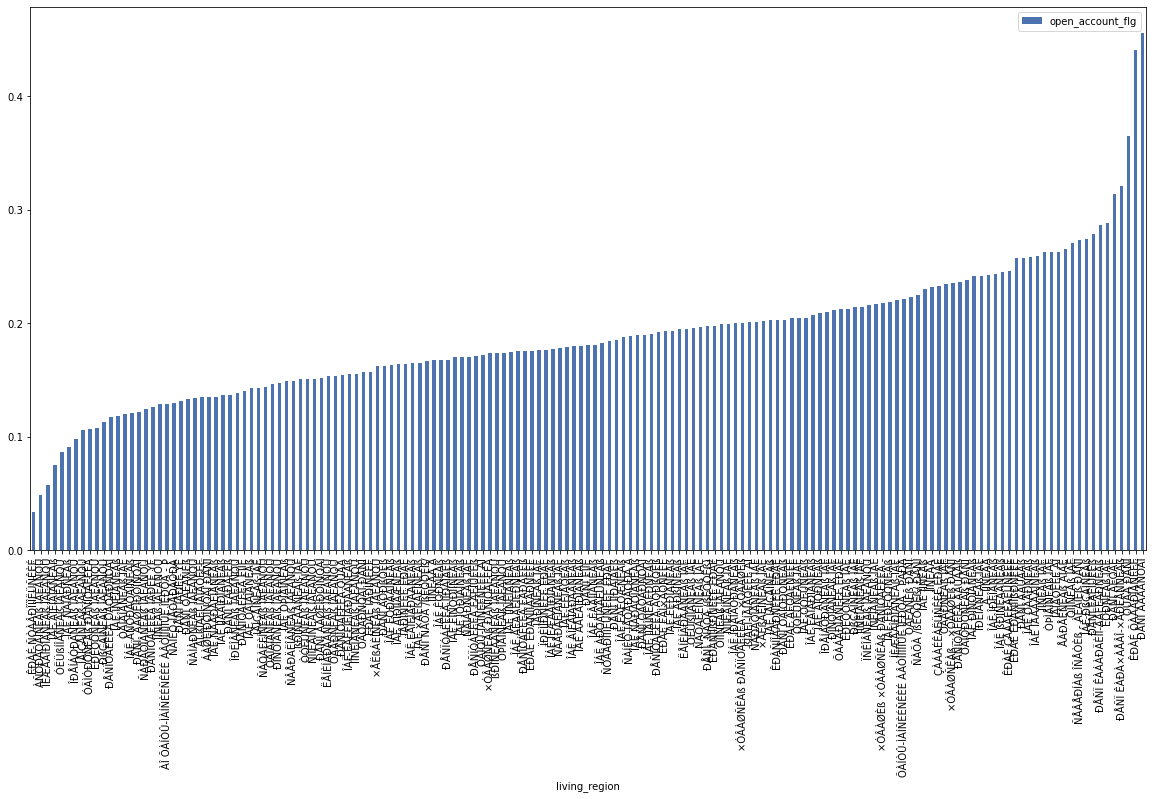

In [40]:
target_by_region[target_by_region.client_id > 50].sort_values("open_account_flg").plot.bar(x='living_region', y='open_account_flg', rot=90)

In [89]:
target_by_edu = credit_train.groupby("education").agg({'client_id': 'count', 'open_account_flg': 'mean'}).reset_index()

<AxesSubplot:xlabel='education'>

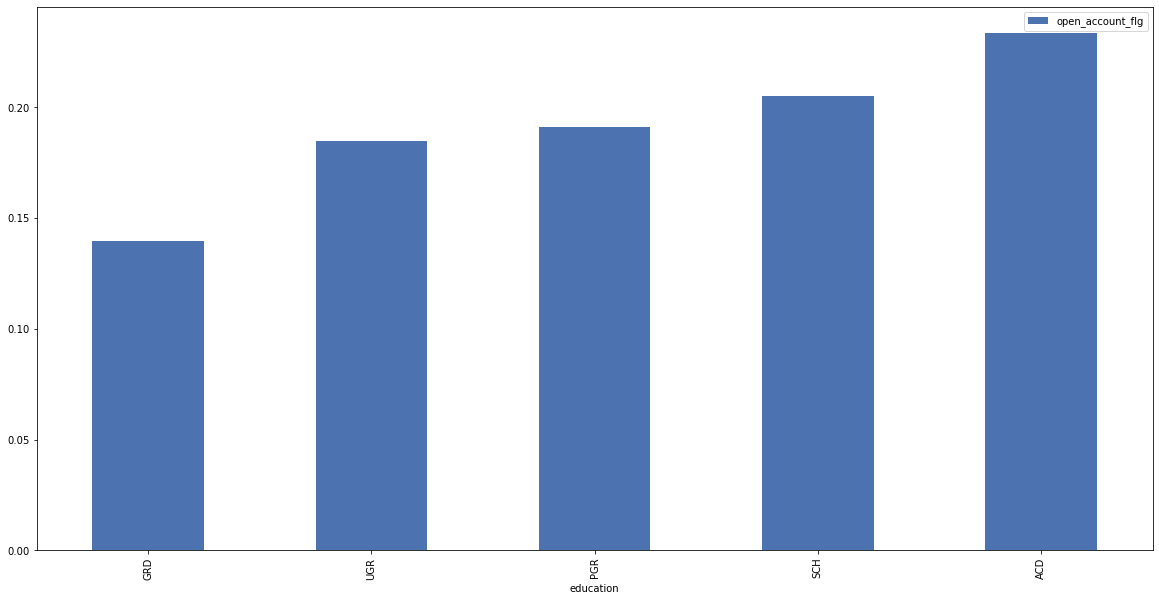

In [94]:
target_by_edu.sort_values("open_account_flg").plot.bar(x='education', y='open_account_flg', rot=90)

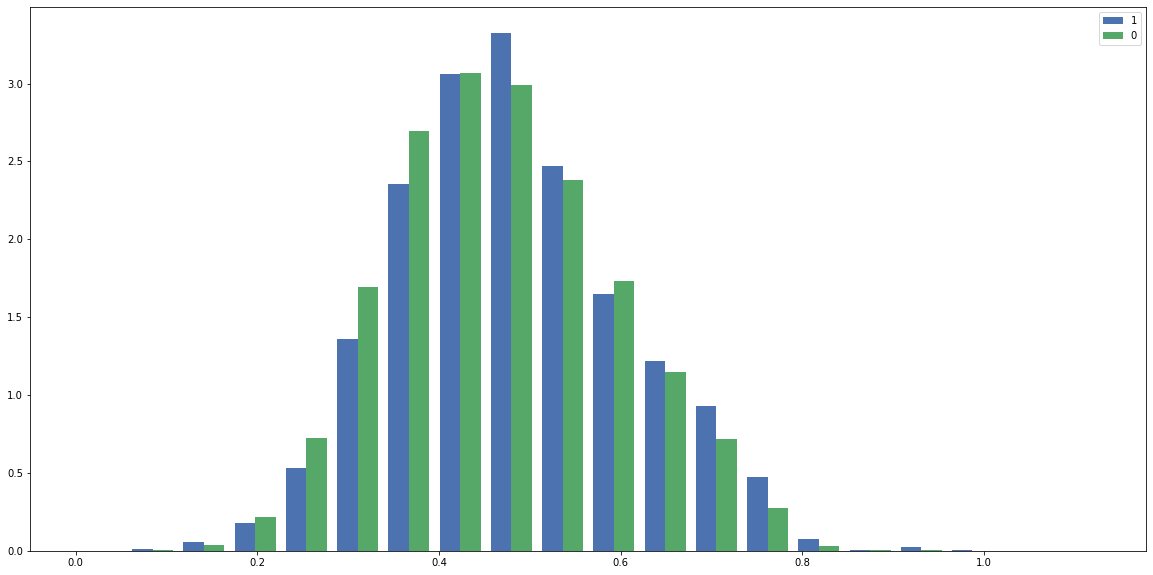

In [56]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = credit_train[(credit_train.open_account_flg == 1) & (credit_train.monthly_income <= 200000)].score_shk.apply(lambda x: x.replace(",",".")).astype("float")
y = credit_train[(credit_train.open_account_flg == 0) & (credit_train.monthly_income <= 200000)].score_shk.apply(lambda x: x.replace(",",".")).astype("float")
#bins = np.linspace(-10, 10, 30)

plt.hist([x, y],  label=['1', '0'], bins=20, density=True)
plt.legend(loc='upper right')
plt.show()

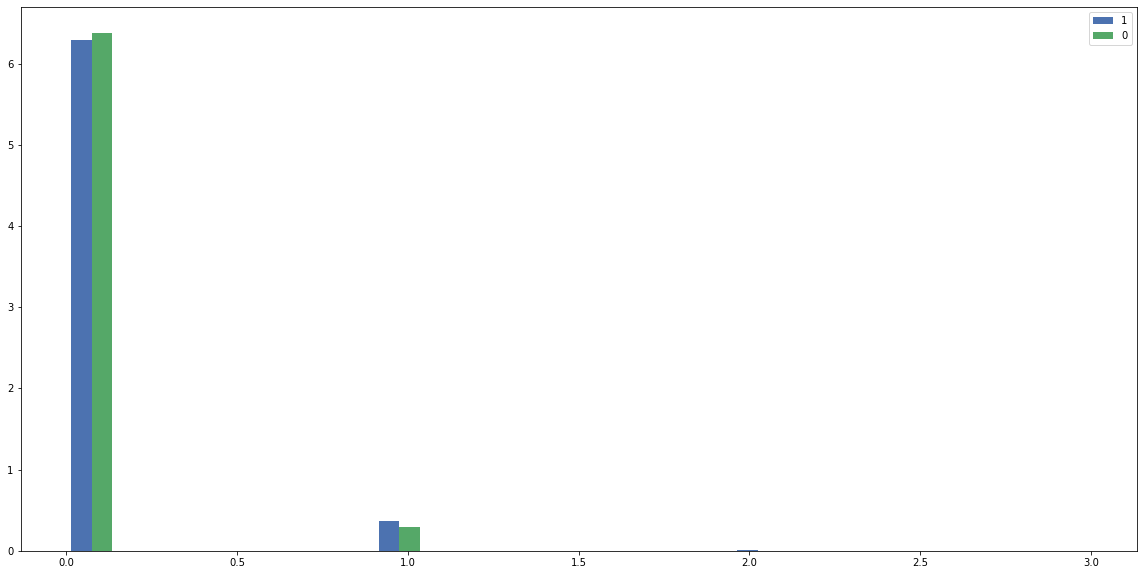

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = credit_train[(credit_train.open_account_flg == 1)].overdue_credit_count
y = credit_train[(credit_train.open_account_flg == 0)].overdue_credit_count
#bins = np.linspace(-10, 10, 30)

plt.hist([x, y],  label=['1', '0'], bins=20, density=True)
plt.legend(loc='upper right')
plt.show()

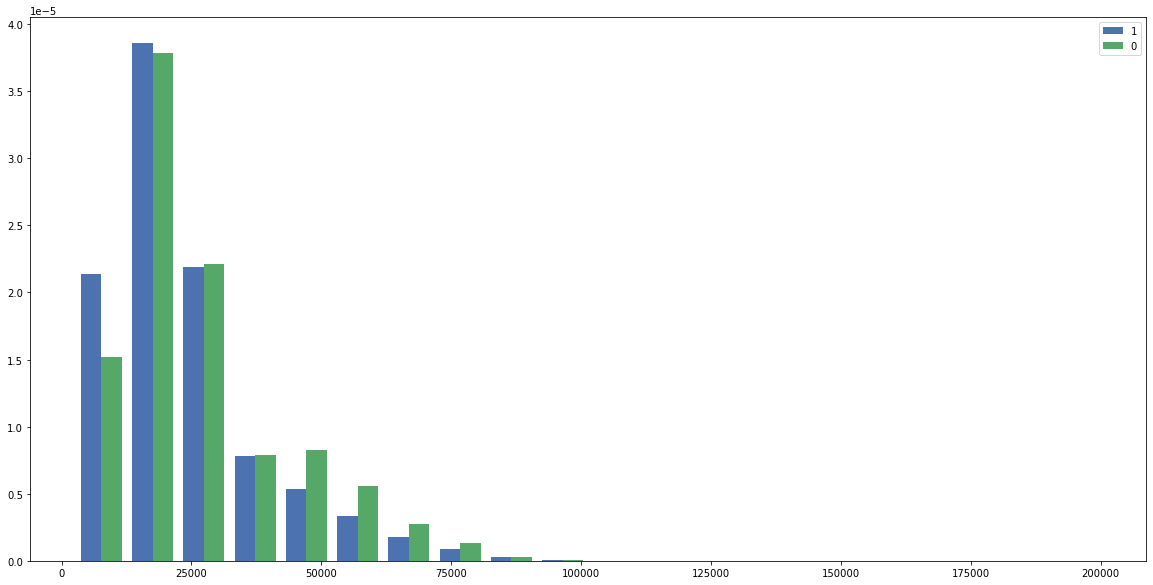

In [98]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = credit_train[(credit_train.open_account_flg == 1)].credit_sum.apply(lambda x: x.replace(",",".")).astype("float")
y = credit_train[(credit_train.open_account_flg == 0)].credit_sum.apply(lambda x: x.replace(",",".")).astype("float")
#bins = np.linspace(-10, 10, 30)

plt.hist([x, y],  label=['1', '0'], bins=20, density=True)
plt.legend(loc='upper right')
plt.show()

In [90]:
y.median()

35000.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


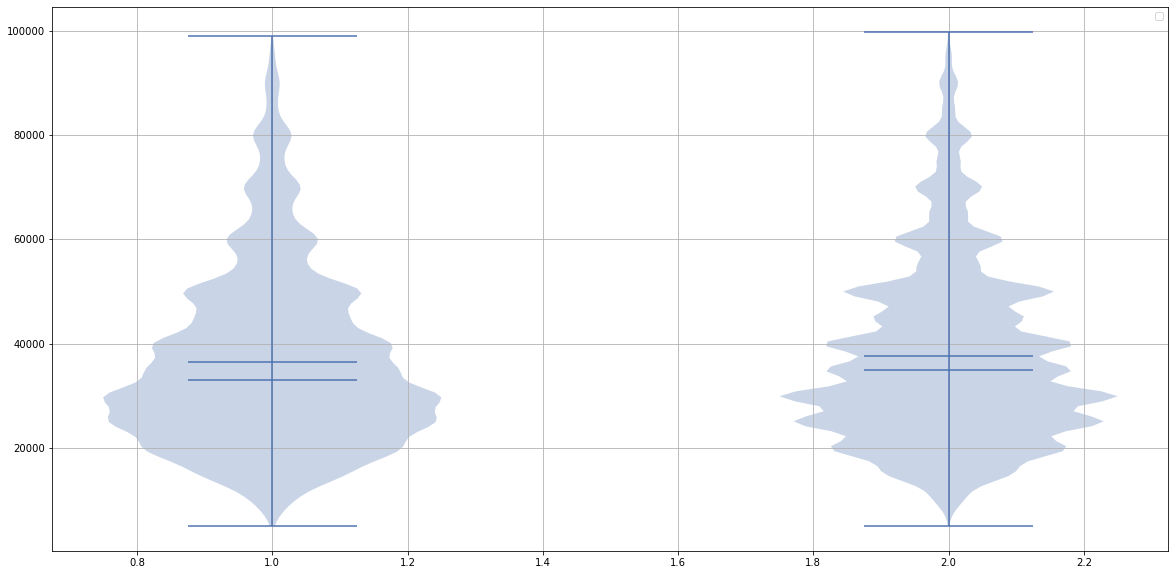

In [95]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = credit_train[(credit_train.open_account_flg == 1) & (credit_train.monthly_income < 100000)].monthly_income
y = credit_train[(credit_train.open_account_flg == 0) & (credit_train.monthly_income < 100000)].monthly_income
#bins = np.linspace(-10, 10, 30)

plt.violinplot([x, y],  showmeans=True, showmedians=True)
plt.legend(loc='upper right')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


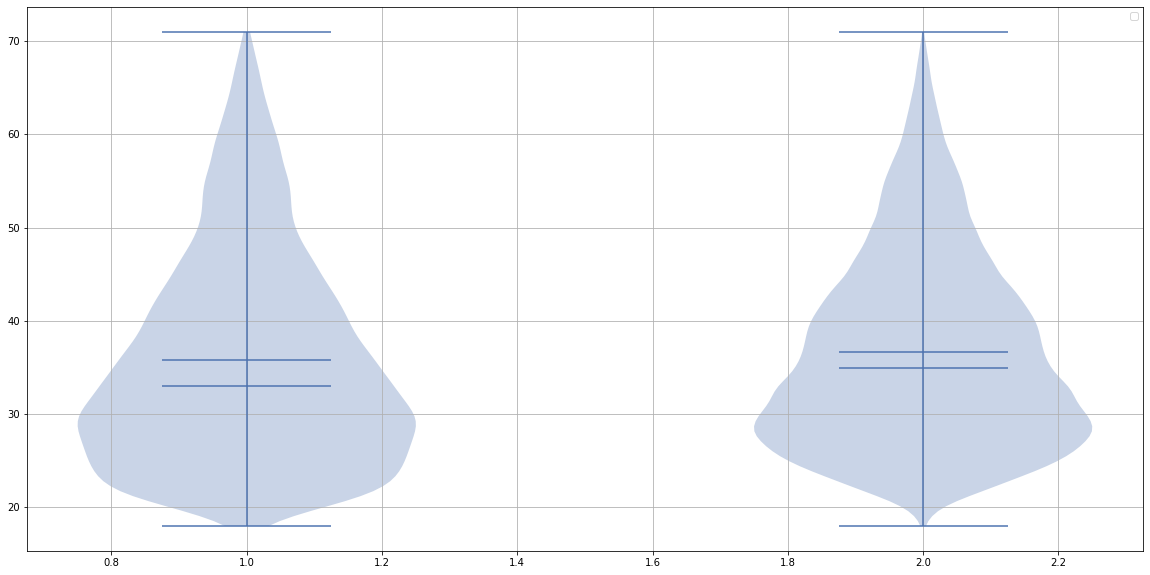

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = credit_train[(credit_train.open_account_flg == 1)].age
y = credit_train[(credit_train.open_account_flg == 0)].age
#bins = np.linspace(-10, 10, 30)

plt.violinplot([x, y],  showmeans=True, showmedians=True)
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [33]:
credit_train[(credit_train.open_account_flg == 1)].describe()

,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,30056.000000,30056.000000,30056.000000,30056.000000,30056.000000,26607.000000,26607.000000,30056.0
mean,85402.609030,35.788495,11.178234,1.289541,38854.457945,2.251438,0.057241,1.0
std,49225.465084,11.428049,4.069853,0.208283,23250.872620,1.898003,0.235360,0.0
min,18.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,1.0
25%,42974.750000,27.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,1.0
50%,85414.000000,33.000000,10.000000,1.300000,35000.000000,2.000000,0.000000,1.0
75%,127940.500000,43.000000,12.000000,1.430000,48000.000000,3.000000,0.000000,1.0
max,170730.000000,71.000000,36.000000,1.940000,500000.000000,21.000000,3.000000,1.0


In [50]:
credit_train.describe()

,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170746.000000,170746.000000,170745.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497283,10.980749,1.323900,40138.288354,2.107308,0.046070,0.176028
std,49290.268869,10.546008,3.536698,0.235813,25044.205336,1.777128,0.211548,0.380845
min,1.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,34.000000,10.000000,1.320000,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,43.000000,12.000000,1.600000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


In [176]:
credit_train.shape

(170746, 15)

In [53]:
credit_train.gender.value_counts()

F    88697
M    82049
Name: gender, dtype: int64

In [54]:
credit_train[(credit_train.open_account_flg == 1)].gender.value_counts()

M    15881
F    14175
Name: gender, dtype: int64

1. Процент целевого события равен 
2. Портрет неблагонадежного заемщика мужчина 35 лет, брал кредит более 2 раз, со средним доходом 38 тыс, из региона ÎÁË ÌÎÑÊÎÂÑÊÀß
3. Средний портрет нашего клиента это женщина 36 лет, брала кредит более 2 раз, со средним доходом  40 тыс, из региона ÎÁË ÌÎÑÊÎÂÑÊÀß
4. Список регионов большим процентом дефота среди клиентов

['ÑÅÂÅÐÍÀß ÎÑÅÒÈß - ÀËÀÍÈß ÐÅÑÏ',
 'ÎÁË ÐßÇÀÍÑÊÀß',
 'ÐÅÑÏ ÊÀËÌÛÊÈß',
 'ÐÅÑÏ ÊÀÁÀÐÄÈÍÎ-ÁÀËÊÀÐÑÊÀß',
 'ÊÓÐÑÊÀß ÎÁË',
 'ÐÅÑÏ ÀËÒÀÉ',
 'ÐÅÑÏ ÊÀÐÀ×ÀÅÂÎ-×ÅÐÊÅÑÑÊÀß',
 'ÒÛÂÀ ÐÅÑÏ',
 'ÊÐÀÉ ÕÀÁÀÐÎÂÑÊÈÉ',
 'ÐÅÑÏ ÄÀÃÅÑÒÀÍ']


In [4]:
import folium

In [6]:
geo_train = pd.read_csv("./data/merchants_train.csv", sep=";")

In [7]:
geo_train.latitude.mean(), geo_train.longitude.mean()

(56.156350136686314, 40.0825002709193)

In [8]:
locations = zip(geo_train.longitude, geo_train.latitude)

In [9]:
from folium.plugins import HeatMap, MarkerCluster

# Create a Map instance
m = folium.Map(location=[geo_train.longitude.mean(), geo_train.latitude.mean()], zoom_start=5, control_scale=True)


In [10]:
MarkerCluster(locations).add_to(m)

In [16]:
m.save("output/map.png")

In [17]:
m